In [1]:
import pandas as pd
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
X=raw_df.drop(columns = ['Class'])
y=raw_df['Class']
print('X:', X.shape)
print('Y:', y.shape)

X: (284807, 30)
Y: (284807,)


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


X_train: (199364, 30)
X_test: (85443, 30)


In [3]:
import lightgbm as lgb
model = lgb.LGBMClassifier(is_unbalance=True)
model.fit(X_train,y_train)

LGBMClassifier(is_unbalance=True)

In [4]:
from sklearn.metrics import accuracy_score
pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.9828423627447538


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    if title is None:
        pass
    else:
        plot.set_title(title)
        
    plt.show()

In [6]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 85295, 1: 148}

(85443,)


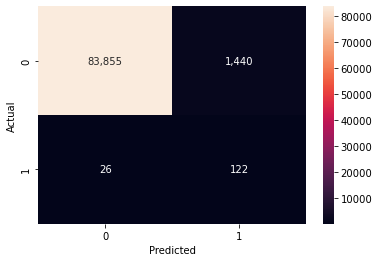

In [7]:
plot_confusion_matrix(y_test, pred)
